#On Conformal Predictions and Loss Function

###*Summer Student Project by Alexander David Balinsky*

####August-September 2023

<br>

---

*Abstract*:
We aim to demonstrate that conformal predictions can be interpreted as a hypothesis test with a p-value. In this test, the ‘statistic’ is defined by machine learning algorithms, and the probability with respect to an unknown probability distribution is replaced by an empirical p-value.”

---


<br>
<br>

**Statistics** is  a numerical characteristic of a sample. For example, the sample means and sample variance.
<br><br>

**Conformal Prediction** is a set of algorithms that provide estimations of
the uncertainty of predictions by a machine learning (ML) model.


<br>

The **p-value** is the probability of getting the observed value of the test statistics, or a value with even greater evidence against the null hypothesis $H_0$, if the null hypothesis is actually true.


<br>

In the case of supervised machine learning, our null hypothesis is that an observation (sample, label) is from some unknown probability distribution of ‘correct’ data.

To reject this null hypothesis (i.e., to declare the label wrong), we need a ‘*statistic*’ that becomes bigger for wrong labels and smaller for correct ones. This requirement is very similar to the notion of a ‘loss function’ in machine learning.

Such a loss function can be extracted from machine learning algorithms that learn by optimization.

However, we still don’t know the underlying probability distribution. To overcome this problem in calculating p-value, we will use ‘empirical p-value’ with respect to some ‘calibrating set’ of examples and their loss values.

Let us make all this more precise with some examples.

## A non-conformity measure

Let $Z$ be a set of possible observations.

**Definition**. A *non-conformity measure* A is a sequence of equivariant maps $A^{(n)}$ from $Z^n$ to $\mathbf{R}^n$ with $n =1,2,3, \ldots$.

Given a non-conformity measure $A$ and a sequence of observations $z_1, z_2, \ldots, z_n$, the output will be a sequence of non-conformity scores $\alpha_1, \alpha_2, \ldots, \alpha_n$.


**Intuition**: small non-conformity score means that sample are similar to other samples, i.e. from the same distribution.

In plain English, the definition above tell us, that
$$
\alpha_i = A_n(z_i; z_1, \ldots , z_{i-1}, z_{i+1}, \ldots, z_n),
$$

where $A_n: Z^n → \mathbf{R}$ and is invariant under permutation of the last $n-1$ variables.

---

<br><br>
By calculating the non-conformity score for all the samples in the data set, including the new sample, and ranking them, we get an idea of how well the new sample fits within the data set. If the new sample has a hight non-conformity score, it fits the data set poorly. This notion is defined formally by the $p-$value.

$$
p:= \frac{|\{ i=1,\ldots, n+1 \ : \ \alpha_i \geq \alpha_{n+1}  \}|}{n+1}
$$

Here $\alpha_i$ is the non-conformity score of a sample and $n$ is the size of the initial data set,
so $n+1$ is, therefore, the size of the data set with the new sample. <br><br>

* *A high p-value indicates that the sample conform to the data set!* The $p$-value is always between 0 and 1.

The significance level can be seen as 1 minus the confidence level,
so if we want to be 95% confident, the significance level should be set to 5%.


---




When regarding the function $\alpha$ as a "test statistic," the value $p$ mentioned earlier represents the "**Empirical P Value**" corresponding to an unknown probability distribution on $Z$.



This is espessially clear when the function $A_n$ depends only on the first argument, i.e. $\alpha_i = A(z_i)$.

We also intuitively expect that $\alpha$ is small for data of interest.

In [ ]:
%matplotlib inline
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


In [ ]:
def p_conformal(scores):
  """
    p_conformal  return p-value of the last elements in an numpy array scores.

    :param scores: array of non-conformity scores
    :return: p-value of the last element in the array
  """
  scores = np.array(scores)

  return np.sum(scores >= scores[-1])/len(scores)


Let us define smoothed p-value to avoid problems with ties.

$$
p:= \frac{|\{ i=1,\ldots, n+1 \ : \ \alpha_i > \alpha_{n+1}  \}| +
\tau  |\{ i=1,\ldots, n+1 \ : \ \alpha_i = \alpha_{n+1}  \}|}{n+1}
$$

The number $\tau$ is generated randomely from a uniform distribution between [0,1].

In [ ]:
def p_conformal_smooth(scores):
  """
    p_conformal_smooth  return smoothed p-value of the last elements in an numpy array scores.

    :param scores: array of non-conformity scores
    :return: smoothed p-value of the last element in the array
  """
  scores = np.array(scores)

  #generating random numbers between 0 and 1
  tau = np.random.random()

  return (np.sum(scores > scores[-1]) + tau * np.sum(scores == scores[-1]) )/len(scores)



## Inductive Conformal Prediction

There exist two primary categories within Conformal Predictions:

* Transductive Conformal Prediction
* Inductive Conformal Prediction

In brief, these two align with instance-based and model-based methodologies in the field of Machine Learning.

In scenarios involving extensive datasets, the model-based approach is generally favored due to its enhanced computational efficiency.


---
Mathematically, transductive conformal prediction is where the function $A_n$ depends on all samples $z_i$'s, and inductive conformal predictor is when $A_n$ depends only on the first argument, i.e is just "test statistics".

Within the realm of inductive conformal prediction, a pivotal inquiry arises: how can we identify appropriate "test statistics"? The solution emerges from the domain of Machine Learning: we harness a subset of training examples (referred to as the Training Set Proper) to ascertain a function that exhibits small values when applied to data originating from the relevant probability distribution. In this context, the most innate choice of function is the "**Loss Function**" or its adapted variants, given that the essence of Machine Learning revolves around minimizing the loss function with respect to our dataset.


---

<br>

After geting a non-conformity measure $A$, we use the rest of training data for calibration, i.e. to calculate an empirical p-value for new (test) examples.

Prediction:= Label with max p-value

Prediction Set:= Labels with p-value > $\epsilon$

Credibility:= Value of max p-value

Confidence:= 1 - second largest p-value.


## Example with MNIST

## Load a dataset

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


Let us view some examples:

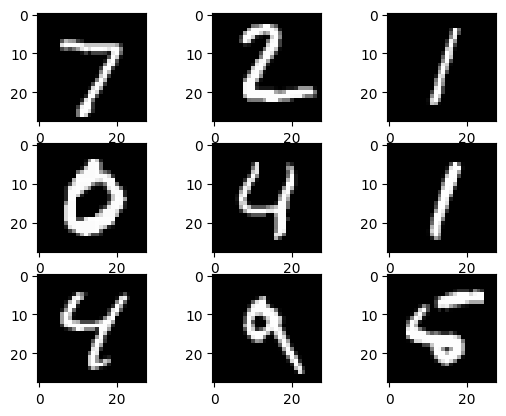

In [ ]:
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(x_test[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

## Build a deep learning machine learning model

Build a `tf.keras.Sequential` model:

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.4811323 ,  0.7378907 ,  0.62883806, -0.49940604,  0.04265176,
         0.23747467, -0.3627085 ,  0.43426463, -0.90551144,  0.0528156 ]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class:

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.13259834, 0.17141423, 0.15370426, 0.04973885, 0.08552802,
        0.10392474, 0.05702465, 0.12652716, 0.03313801, 0.08640175]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.
<br><br>

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:



In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.2640882

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss:

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2963 - accuracy: 0.9134
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1425 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1074 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0883 - accuracy: 0.9728
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0752 - accuracy: 0.9766


The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0719 - accuracy: 0.9783 - 687ms/epoch - 2ms/step


[0.07194601744413376, 0.9782999753952026]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:2])

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[1.3235202e-08, 7.4329998e-10, 7.8401024e-07, 1.0295601e-04,
        4.5997039e-12, 1.4069229e-07, 1.5903126e-12, 9.9989212e-01,
        2.5541755e-08, 4.0619166e-06],
       [1.2753340e-08, 2.0390144e-04, 9.9975628e-01, 3.7603291e-05,
        2.7342048e-15, 1.7068891e-07, 8.9247102e-08, 1.4865991e-14,
        1.8614224e-06, 1.0590356e-14]], dtype=float32)>

Let us see examples from the test set with wrong predictions

In [ ]:
predictions_on_tests = np.argmax(probability_model(x_test), axis=1)
predictions_on_tests

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
sum(predictions_on_tests != y_test)

217

In [ ]:
wrong_predictions = x_test[predictions_on_tests != y_test]
wrong_predictions.shape

(217, 28, 28)

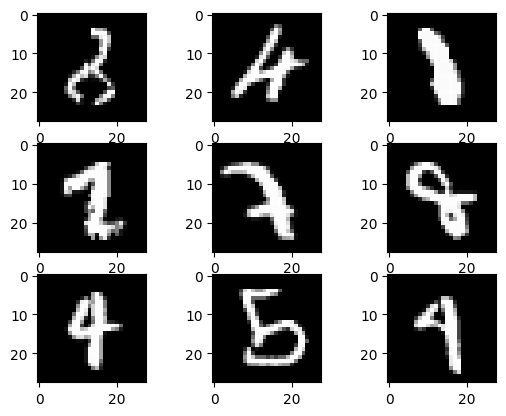

In [ ]:
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(wrong_predictions[i+9], cmap=pyplot.get_cmap('gray'))
pyplot.show()

<br><br>

### MNIST and Inductive CP with simple loss function
--------------

So, we trained our model on the training data, and now let us forget about the training data.

We devide test data into two parts: `x_calibrate_cp` and `x_test_cp`,
 with corresponding labels `y_calibrate_cp` and `y_test_cp`

In [ ]:
from sklearn.model_selection import train_test_split



x_calibrate_cp, x_test_cp, y_calibrate_cp , y_test_cp = train_test_split(x_test, y_test,
                                                    test_size=0.5,
                                                    random_state=0,
                                                    shuffle=True,
                                                    stratify=y_test)

Let us look into performance of our model on `x_calibrate_cp, x_test_cp`:

In [ ]:
model.evaluate(x_test_cp,  y_test_cp, verbose=2)

157/157 - 0s - loss: 0.0690 - accuracy: 0.9798 - 292ms/epoch - 2ms/step


[0.06904655694961548, 0.9797999858856201]

In [ ]:
model.evaluate(x_calibrate_cp,  y_calibrate_cp, verbose=2)

157/157 - 0s - loss: 0.0748 - accuracy: 0.9768 - 283ms/epoch - 2ms/step


[0.07484547048807144, 0.9768000245094299]


<br>
The non-conformity scores for `x_calibrate_cp` can be calculated in advance by using the loss function:
<br>

In [ ]:
# alpha scores for calibrating set

A_calibrate = -tf.math.log(probability_model(x_calibrate_cp)).numpy()
alpha_calibrate = np.array([A_calibrate[i, y_calibrate_cp[i]] for i in range(len(y_calibrate_cp))])


In [ ]:
alpha_calibrate

array([6.2586834e-05, 3.8624556e-05, 1.5049571e-03, ..., 5.6983663e-05,
       5.3884050e-05, 2.3824011e-01], dtype=float32)

In [ ]:
#y_calibrate_cp_predictions= np.argmin(A_calibrate, axis =1)
#sum(y_calibrate_cp != y_calibrate_cp_predictions)

#alpha_calibrate = np.min(A_calibrate, axis =1)
#alpha_calibrate.max()

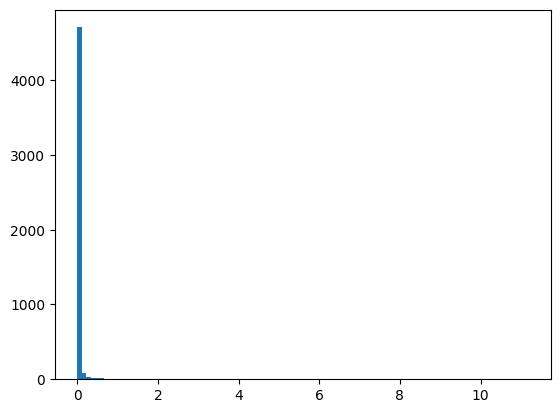

In [ ]:
import matplotlib.pyplot as plt
plt.hist(alpha_calibrate, bins = 100)
plt.show()

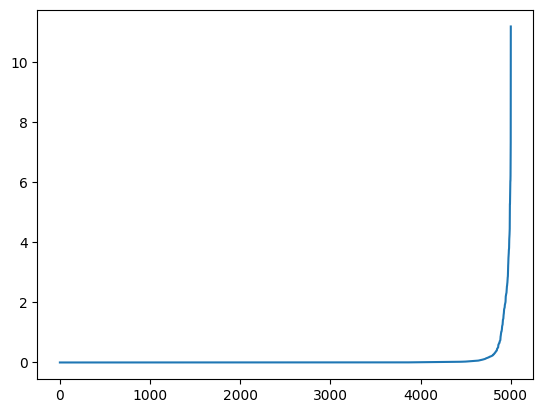

In [ ]:
plt.plot(range(len(alpha_calibrate)), np.sort(alpha_calibrate))

## Epsilon = 0.05

We have 5000 elements in the callibrating set, so if we want $\epsilon = 0.05$, we need to calculate 4750 element in ordered list of `np.sort(alpha_calibrate)`

In [ ]:
thresh = np.sort(alpha_calibrate)[4749]
thresh

0.16539851

In [ ]:
#Probability for this threshold is
tf.math.exp(-thresh).numpy()

0.8475559

In [ ]:
A_test_cp = -tf.math.log(probability_model(x_test_cp)).numpy()

In [ ]:
A_test_cp < thresh

array([[False, False,  True, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])

In [ ]:
list_cp0 = [i for i in range(len(y_test_cp)) if np.sum(A_test_cp < thresh, axis =1)[i] == 0]
list_cp1 = [i for i in range(len(y_test_cp)) if np.sum(A_test_cp < thresh, axis =1)[i] == 1]
list_cp2 = [i for i in range(len(y_test_cp)) if np.sum(A_test_cp < thresh, axis =1)[i] > 1]

In [ ]:
print("Examples without labels:  ",len(list_cp0))
print("Examples with one  label:  ",len(list_cp1))
print("Examples with more than one  label:  ",len(list_cp2))

Examples without labels:   226
Examples with one  label:   4774
Examples with more than one  label:   0


### Examples without labels

Let us see some examples of handwritten digits that cant have reliable labels:

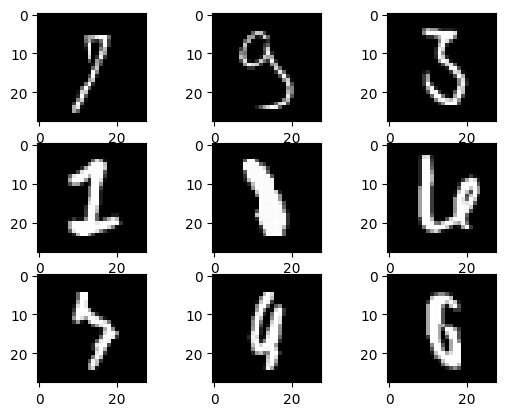

In [ ]:
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(x_test_cp[list_cp0[i]], cmap=pyplot.get_cmap('gray'))
pyplot.show()

## Epsilon = 0.01

We have 5000 elements in the callibrating set, so if we want $\epsilon = 0.01$, we need to calculate 4950 element in ordered list of `np.sort(alpha_calibrate)`

In [ ]:
thresh = np.sort(alpha_calibrate)[4949]
thresh

2.3008108

In [ ]:
#Probability for this threshold is
tf.math.exp(-thresh).numpy()

0.100177586

In [ ]:
A_test_cp = -tf.math.log(probability_model(x_test_cp)).numpy()

In [ ]:
A_test_cp < thresh

array([[False, False,  True, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])

In [ ]:
list_cp0 = [i for i in range(len(y_test_cp)) if np.sum(A_test_cp < thresh, axis =1)[i] == 0]
list_cp1 = [i for i in range(len(y_test_cp)) if np.sum(A_test_cp < thresh, axis =1)[i] == 1]
list_cp2 = [i for i in range(len(y_test_cp)) if np.sum(A_test_cp < thresh, axis =1)[i] > 1]

In [ ]:
print("Examples without labels:  ",len(list_cp0))
print("Examples with one  label:  ",len(list_cp1))
print("Examples with more than one  label:  ",len(list_cp2))

Examples without labels:   0
Examples with one  label:   4742
Examples with more than one  label:   258


### Examples with more than one label labels

Let us see some examples of handwritten digits that have multiple  reliable labels:

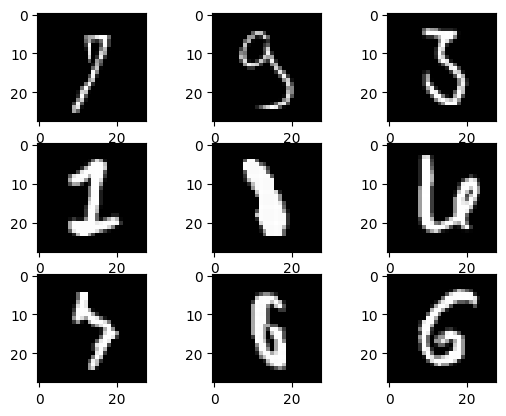

In [ ]:
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(x_test_cp[list_cp2[i]], cmap=pyplot.get_cmap('gray'))
pyplot.show()

<br><br>
---

# TO DO